## Dependencies

In [48]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [63]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [64]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Keras Specific Dependencies

In [66]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

## Loading and Preprocessing our Data

### Load the Fashion MNIST Dataset from Keras

In [67]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [68]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [95]:
## Explore the data

In [69]:
train_images.shape

(60000, 28, 28)

In [70]:
len(train_labels)

60000

In [71]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [72]:
test_images.shape

(10000, 28, 28)

In [73]:
len(test_labels)

10000

### Preprocess the data

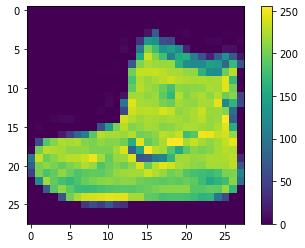

In [74]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [75]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
## verify the data

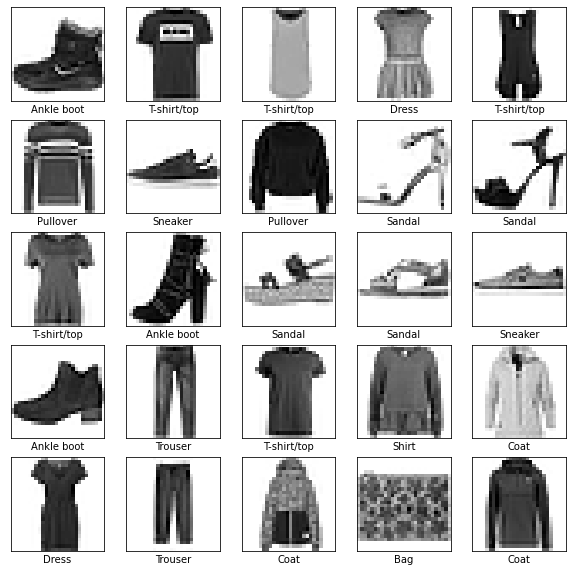

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [96]:
## Compile the model

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the MODEL


In [ ]:
## Feed the model

In [79]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6283 - accuracy: 0.7837
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3881 - accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3440 - accuracy: 0.8753: 0s
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2657 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2551 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2388 - accuracy: 0.9106
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0

## Evaluate accurancy


In [80]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3438 - accuracy: 0.8790

Test accuracy: 0.8790000081062317


## Make predictions

In [81]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [82]:
predictions = probability_model.predict(test_images)

In [83]:
predictions[0]

array([1.6923472e-08, 8.9586220e-12, 1.0275578e-11, 1.0518769e-12,
       8.5171009e-11, 1.9230138e-04, 2.8224891e-09, 2.5929215e-03,
       5.6619101e-09, 9.9721473e-01], dtype=float32)

In [84]:
np.argmax(predictions[0])

9

In [85]:
test_labels[0]

9

In [89]:
## Graph this to look at the full set of 10 class predictions

In [90]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [104]:
## Verify predictions

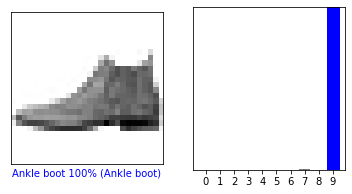

In [92]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

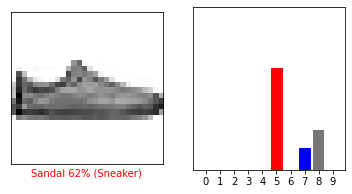

In [93]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

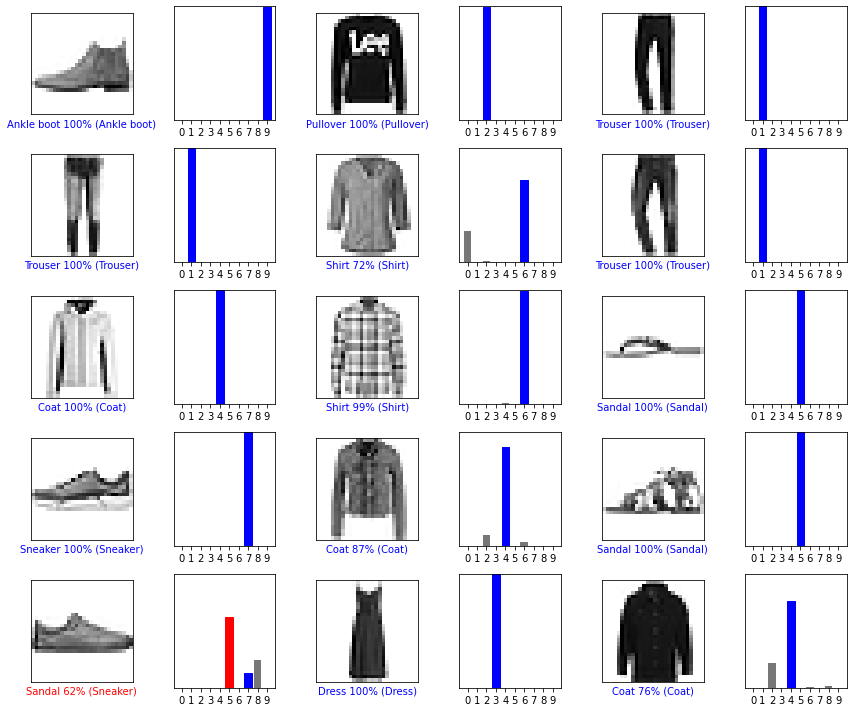

In [94]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [97]:
## Use the trained model

In [117]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [118]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [119]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.0997489e-05 1.8029634e-13 9.9800199e-01 9.9284921e-12 2.6752986e-04
  4.4343229e-15 1.6995457e-03 2.3290327e-17 5.3539564e-12 2.4256676e-16]]


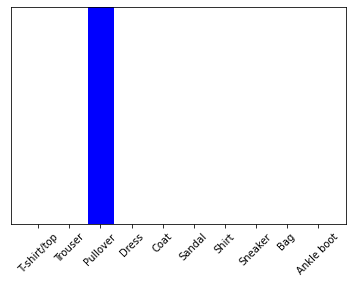

In [120]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [121]:
np.argmax(predictions_single[0])

2

## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [122]:
# Save the model
model.save("mnist_trained.h5")

In [123]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("mnist_trained.h5")

## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [23]:
# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

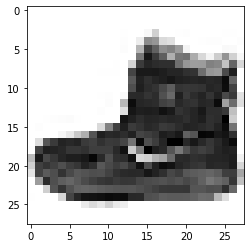

In [24]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [25]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(test).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

(1, 784)

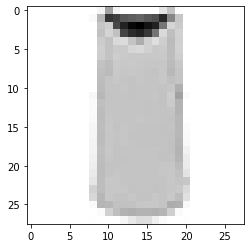

In [27]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [28]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/paulalopes/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted class: [0]


# Import a Custom Image

In [126]:
filepath = "Images/shoes.png"

In [127]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [128]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [129]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

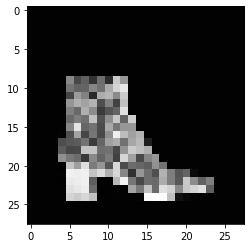

In [130]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

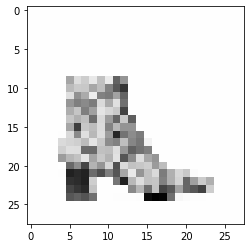

In [131]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [132]:
# Make predictions
model.predict_classes(img)

array([8])